In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load dataset
data = pd.read_csv('car_price_data.csv')
print(data.head())


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [3]:
print(data.info())
print(data.describe())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       

In [4]:
# Fill or drop missing values
data.dropna(inplace=True)

# Convert categorical variables
data = pd.get_dummies(data, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

# Drop the 'Car_Name' column as it's not useful for prediction
data.drop(['Car_Name'], axis=1, inplace=True)

# Display the processed data
print(data.head())


   Year  Selling_Price  Present_Price  Kms_Driven  Owner  Fuel_Type_Diesel  \
0  2014           3.35           5.59       27000      0             False   
1  2013           4.75           9.54       43000      0              True   
2  2017           7.25           9.85        6900      0             False   
3  2011           2.85           4.15        5200      0             False   
4  2014           4.60           6.87       42450      0              True   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0              True                   False                 True  
1             False                   False                 True  
2              True                   False                 True  
3              True                   False                 True  
4             False                   False                 True  


In [5]:
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Create the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)


LinearRegression()

In [8]:
y_pred = model.predict(X_test)


In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 3.478803970641277
R² Score: 0.8489813024897601


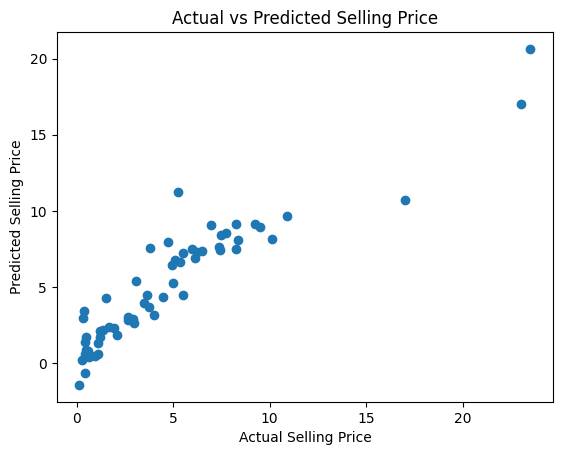

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.show()